In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 获取数据

In [2]:
df = pd.read_csv('data.csv')
df

,Brand,Type,Color,Construction Year,Odometer,Ask Price,Days Until MOT,HP
0,Peugeot 106,1.0,blue,2002,166879,999,138,60
1,Peugeot 106,1.0,blue,1998,234484,999,346,60
2,Peugeot 106,1.1,black,1997,219752,500,-5,60
3,Peugeot 106,1.1,red,2001,223692,750,-87,60
4,Peugeot 106,1.1,grey,2002,120275,1650,356,59
5,Peugeot 106,1.1,red,2003,131358,1399,266,60
6,Peugeot 106,1.1,green,1999,304277,799,173,57
7,Peugeot 106,1.4,green,1998,93685,1300,0,75
8,Peugeot 106,1.1,white,2002,225935,950,113,60
9,Peugeot 106,1.4,green,1997,252319,650,133,75


In [3]:
# 把颜色，类型独热编码
df_colors = df['Color'].str.get_dummies().add_prefix('Color: ')
df_type = df['Type'].apply(str).str.get_dummies().add_prefix('Type: ')
df = pd.concat([df, df_colors, df_type], axis = 1)
# 去除独热编码对应的原始列
df = df.drop(['Brand', 'Type', 'Color'], axis = 1)
df

,Construction Year,Odometer,Ask Price,Days Until MOT,HP,Color: black,Color: blue,Color: green,Color: grey,Color: red,Color: white,Type: 1.0,Type: 1.1,Type: 1.4
0,2002,166879,999,138,60,0,1,0,0,0,0,1,0,0
1,1998,234484,999,346,60,0,1,0,0,0,0,1,0,0
2,1997,219752,500,-5,60,1,0,0,0,0,0,0,1,0
3,2001,223692,750,-87,60,0,0,0,0,1,0,0,1,0
4,2002,120275,1650,356,59,0,0,0,1,0,0,0,1,0
5,2003,131358,1399,266,60,0,0,0,0,1,0,0,1,0
6,1999,304277,799,173,57,0,0,1,0,0,0,0,1,0
7,1998,93685,1300,0,75,0,0,1,0,0,0,0,0,1
8,2002,225935,950,113,60,0,0,0,0,0,1,0,1,0
9,1997,252319,650,133,75,0,0,1,0,0,0,0,0,1


Text(0.5, 1.0, 'car Price Variables')

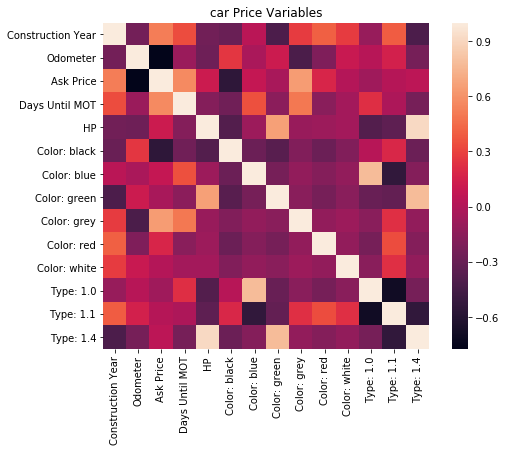

In [4]:
# 数据转换
matrix = df.corr()
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(matrix, square=True)
plt.title('car Price Variables')

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np

In [6]:
X = df[['Construction Year', 'Days Until MOT', 'Odometer']].astype(float)
# 设置值大小（13，1）
y = df['Ask Price'].values.reshape(-1, 1).astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### 特征的缩放,线性归一化， 标准差标准化（0,1）的高斯分布

$$
线性归一化： X_new = \frac{X-min(X)}{max(X) - min(X)}
$$

$$
标准差标准化： X_new = \frac{X-mean(X)}{std(x)}
\\ 在这里：
\\ mean(X) : x 的平均值
\\ std(X) : x  的标准差（是方差的算术平方根）
$$


使用 StandardScaler 的好处在于可以保存训练集中的参数（均值、方差）直接使用其对象转换测试集数据。

In [7]:
X_normalizer = StandardScaler()
X_train = X_normalizer.fit_transform(X_train)
X_test = X_normalizer.transform(X_test)

y_normalizer = StandardScaler()
y_train = y_normalizer.fit_transform(y_train)
y_test = y_normalizer.transform(y_test)

### KNN训练回归模型

In [8]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train.ravel())

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

### 预测二手车价格

In [9]:
y_pred = knn.predict(X_test)

### 将缩放的数据，还原原始表示

In [10]:
y_pred_inv = y_normalizer.inverse_transform(y_pred)
y_test_inv = y_normalizer.inverse_transform(y_test)
print(y_pred)
print(y_pred_inv)

[-0.99800975 -1.10159231  1.00810964 -0.99800975]
[ 724.5  700.  1199.   724.5]


### 可视化

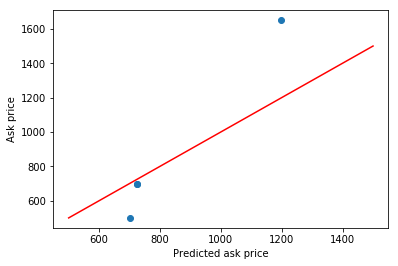

In [11]:
plt.scatter(y_pred_inv, y_test_inv)
plt.xlabel('Pred')
plt.ylabel('Real')

diagonal = np.linspace(500, 1500, 100)
plt.plot(diagonal, diagonal, '-r')
plt.xlabel('Predicted ask price')
plt.ylabel('Ask price')
plt.show()